In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline


os.getcwd()
os.chdir("E:\\DATA SCIENCE\\EDWISOR")
os.getcwd()


#help('read_csv')

df_day=pd.read_csv("day.csv")

#Print the `head` of the data
df_day.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#understanding of data
df_day.shape
#It contains (731, 16)

df_day.describe()

#df_day.info()

#data  consist of Integers , Float  and Object(categorical) variables 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


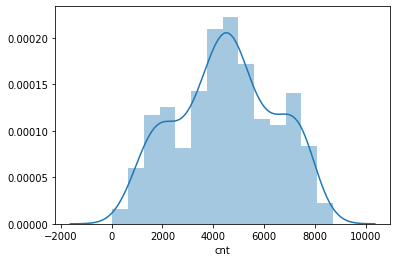

In [13]:

##################################################### Univariate Analysis##########################################
# Target variable  analysis

#descriptive statistics summary
df_day['cnt'].describe()

#Check whether target variable is normal or not
sns.distplot(df_day['cnt']);




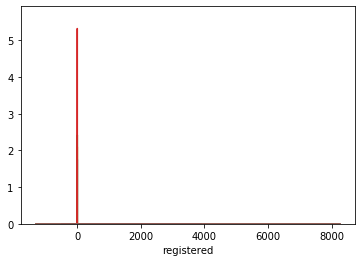

In [14]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

#Check whether  variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['hum']);

#Check whether  variable 'windspeed'is normal or not
sns.distplot(df_day['windspeed']);


#Check whether  variable 'casual'is normal or not
sns.distplot(df_day['casual']);



#Check whether  variable 'registered'is normal or not
sns.distplot(df_day['registered']);


# it is clearly showing that chances of outliers present in  'casual' varible

In [15]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


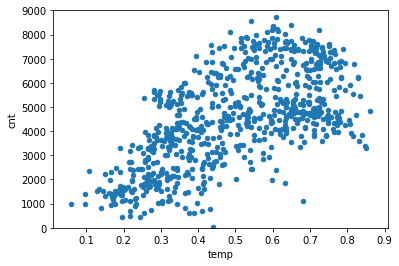

In [16]:
######################################### Bivariate  Relationship #####################################################
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'


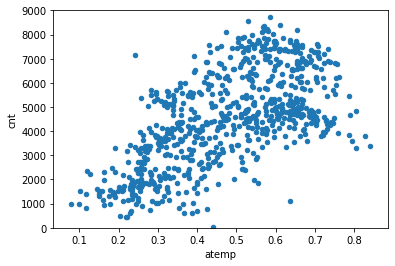

In [4]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df_day['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'


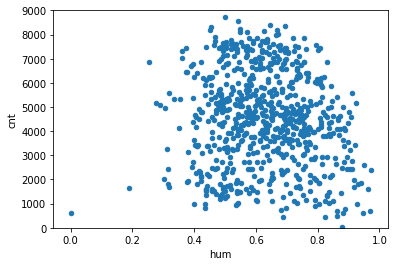

In [19]:
#relation between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


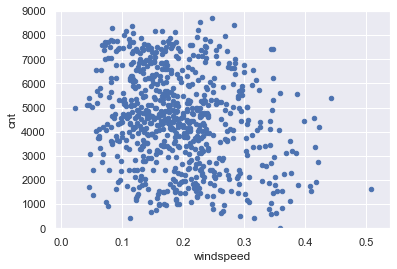

In [10]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'




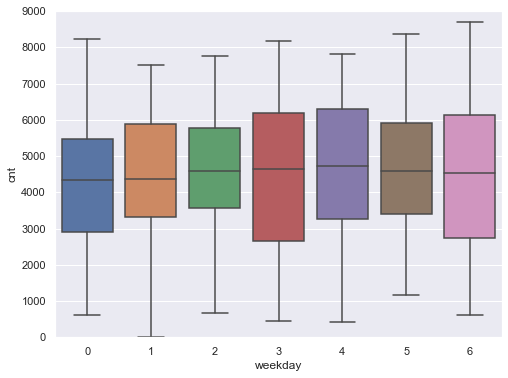

In [11]:

#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000  

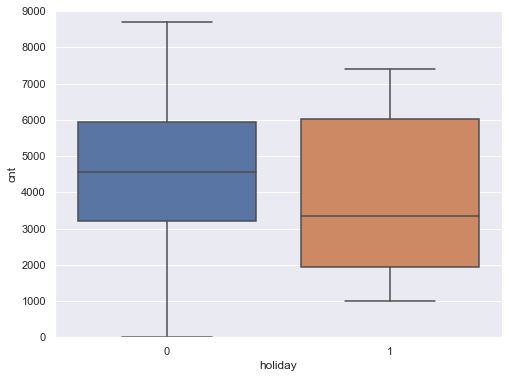

In [12]:

#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [13]:
##########################################   missing  values ##############################################
#total_missing_values = df_day.isnull().sum().sort_values(ascending=False)
#total_missing_value

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


In [15]:
#Already all numeric variable  are in normalize form so  , we are not analysing  Outliers   here

#here the  six  numerics variables are present  out of six four variables are in normalize form , 
#  temp,atem,hum,windspread  are in  normalize form  no need to check outliers

#casual and registered  have to check outliers

df_day_1 =  df_day.copy()


0.6728044333386831

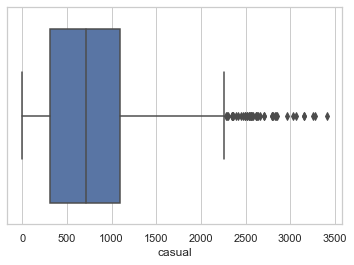

In [16]:
######################################### Outlier Analysis ##########

df_day.head()

#plt.boxplot(df_day_1['casual'])

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day['casual'],orient ='h')

#It seems Outliers are present  in  'Casual' variable  but we are keeping as it is , will detect and  conver outliers  during tuning 
#process

# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])



-855.25
2266.75


0.6460020508747333

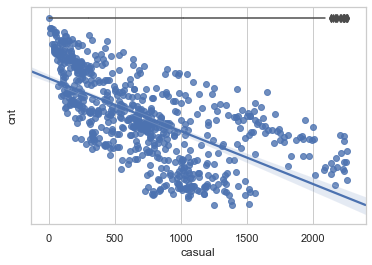

In [6]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

df_day_out = df_day.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

# Boxplot for casual after  a outlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')

# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])


In [2]:
############################################# feature  selection   #######################################
df_day.head()
#Selection of numerical feature  based  on pearson corelation 

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
#day_numeric.shape


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)



NameError: name 'df_day' is not defined

C:\Users\Vijay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


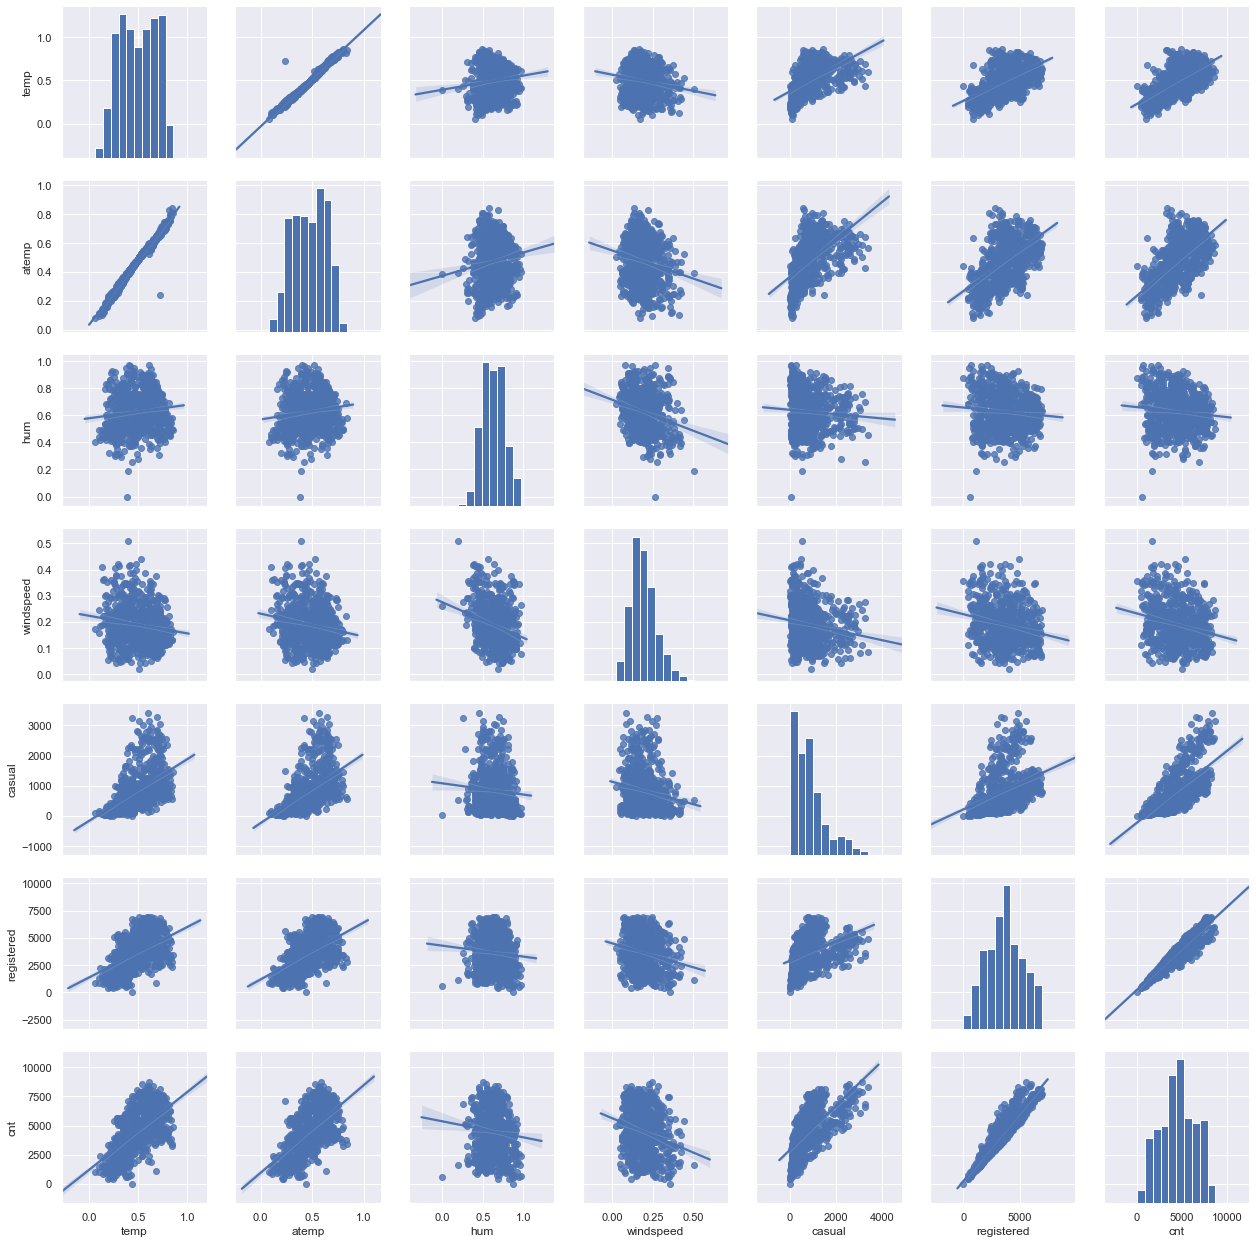

(731, 5)

In [22]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show();

#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

numeric_features.shape


In [1]:
# feature  Scaling
#######################################  Normality  Check ######################################

cnames = ['casual','registered']

for i in cnames :
    print(i)
    df_day[i] = (df_day[i] - min(df_day[i]))/(max(df_day[i]) - min(df_day[i]))

df_day.head()

casual


NameError: name 'df_day' is not defined

In [ ]:
#now iam not checking  categorical feature importance i will check it later during tuning process

#Now  for variable  not doing  Data Scaling  this will do during tuning process
    

In [24]:
#diividing  Test and train data  using skilearn   train_test_split 

df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)
df_day_feature_selection.shape

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_day_feature_selection, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
624,625,2012-09-16,3,1,9,0,0,0,1,0.580000,0.090183,2166,5167,7333
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.155471,644,2451,3095
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.214558,709,5283,5992
227,228,2011-08-16,3,0,8,0,2,1,1,0.700833,0.236329,721,4004,4725
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.084596,1363,6402,7765


In [25]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)



#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predition   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[5255. 7375. 5905. 3744. 1623. 4326. 3867. 3310. 2402. 6234. 2210. 4725.
 4118.  985. 3574. 5558. 4891. 4058. 4790. 4579. 3894. 4725. 2121. 4725.
 4182. 5501. 6855. 2808. 5511. 7499. 6312. 4266. 7580. 6203. 2210. 7290.
 6041. 3520. 3068. 6598. 5409. 5585. 7333. 4844. 3894. 1096. 1005. 7148.
 5119. 4058. 4725. 3740. 2046. 4968. 4840. 3709. 3709. 4186. 4541. 2077.
 2918. 5260. 2046. 6569. 1708. 5315. 4332. 5180. 7421. 1204. 1812. 3872.
 2808. 3071. 3956. 4840. 7460. 3574. 4333. 5115. 2918. 1162. 1204. 7421.
 3926. 4332. 2566. 2933. 1107. 4123. 4109. 7264. 6569. 3574. 5698. 7363.
 7421. 5138. 1416. 6207. 4075. 7697. 4109. 4687. 5698. 3243

In [26]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

# Error  is getting  "3.9060877364738893"

3.9060877364738893

In [27]:

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split =4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

#Now error is getting  '4.179783397343639'

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
[5092.33333333 7569.5        5906.4        3547.5        1709.33333333
 4357.42857143 3822.         3326.         2433.83333333 5986.
 2256.         4798.57142857 4063.07142857  996.         3454.8
 5543.         4798.57142857 3903.33333333 4798.57142857 4557.66666667
 3903.33333333 4798.57142857 2123.         4798.57142857 4181.5
 5567.16666667 7011.2        2827.66666667 5788.         7323.5
 6276.33333333 4357.42857143 7623.         5986.         2256.
 7250.33333333 6036.75       3445.25       3241.         6611.33333333
 5427.4        5664.         7382.         4798.57142857 3903.33333333
 1104.         1050.5        7323.5        5230

4.179783397343639

In [28]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse=np.sqrt(MSE)
print(rmse)

    


8216165.515550335
55892.282418709765
236.4154868419363


In [29]:

def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

#MAPE 
MAPE(test_target_feature,predictions_DT_two)

#MAPE : 3.87
#RMSE

RMSE(test_target_feature,predictions_DT_two)

#236.4154868419363


Mean Square :  55892.282418709765
Root Mean Square :  236.4154868419363


236.4154868419363

In [30]:
#************************************ Random Forest ************************************************
#here  same features are taking  what we took for the Decision Tree
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#train_features_one

# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test_feature)

#print(RF_predict)



In [31]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

#Error rate is 1.9177308818184

#Here it is stating accuracy of the model increases

1.9177308818184

In [32]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_one)

#RMSE =  111.62161584579938

Mean Square :  12459.385124027212
Root Mean Square :  111.62161584579938


111.62161584579938

In [33]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression feature ordering
mir_result
#feature_scores = []
#for i in np.arange(len(train)):
#    feature_scores.append([train_variables_one_1[i],mir_result[i]])
#sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
#print(np.array(sorted_scores))

array([0.20063599, 0.26730443, 0.32304944, 0.01798123, 0.06885701,
       0.07996999, 0.39648088, 0.01989466, 0.68506403, 1.66006678])

In [34]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(pair)) for pair in feature_importances]


[0.00021199433584417538, 0.00039102921155821646, 0.0009035296316502304, 4.8724869967758466e-05, 0.0004914149501675435, 0.00019580187511098173, 0.0012688022814653264, 0.0010240521053545594, 0.10068143717467226, 0.894783213564209]


In [40]:

train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.20063599139341814
yr = 0.2673044349041469
mnth = 0.323049440675518
holiday = 0.017981231631374772
weekday = 0.06885701063550265
weathersit = 0.07996998597310023
temp = 0.3964808849333661
windspeed = 0.019894661196639518
casual = 0.6850640299876769
registered = 1.660066780495228


In [43]:
train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]

NameError: name 'train_variables_one' is not defined

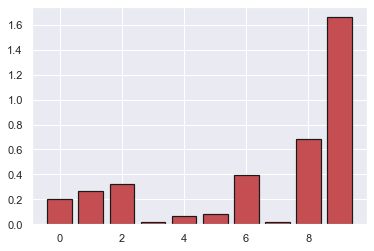

In [45]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [46]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


[4958.388 7579.806 6031.32  3182.518 1890.05  4320.266 3816.728 3370.258
 2001.708 6620.576 2212.696 4943.592 4189.884 1013.232 3516.564 5633.34
 5019.262 3938.358 4975.976 4678.474 3979.544 4851.958 2053.466 4713.968
 4111.812 5511.81  6851.56  3033.146 5278.346 7792.112 6158.806 4276.358
 7468.644 6348.59  2270.86  7214.682 6204.248 3479.364 3109.694 6601.162
 5692.898 5538.2   7565.572 4847.282 3872.514 1061.686 1066.89  7424.46
 5271.254 3938.708 4760.716 3789.34  2004.868 4845.384 4626.006 3739.21
 3721.314 4136.39  4579.956 2076.37  2702.508 5205.186 1933.706 6702.788
 1628.796 5319.416 4356.63  5218.444 7465.224 1243.244 1647.804 3861.812
 2800.306 3342.518 3915.33  4984.384 7899.168 3488.51  4330.514 5095.946
 2395.986 1209.528 1293.32  7427.394 3770.934 4378.016 2721.862 2913.15
 1114.416 4295.572 4113.162 7394.578 6602.532 3571.53  5676.818 7337.758
 7380.372 5670.844 1435.954 6830.42  4108.802 7619.378 4179.032 4768.29
 5681.732 3201.62  5515.898 1448.41  3349.67  4937.754 1

In [47]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

#Error rate is 1.9276505612329415

#Here it is stating accuracy of the model increases slightly

1.9276505612329415

In [48]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)

#RMSE = 99.92744529077154


# Accuracy and  RMSE is improved  

Mean Square :  9985.49432234014
Root Mean Square :  99.92744529077154


99.92744529077154

In [51]:
############################################# Linear Regression ############################
#here  same features are taking  what we took for the Linear Regression
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#test_target_feature

#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

#Summary of model
linear_regression_model.summary()

#predict the  model

predict_LR = linear_regression_model.predict(test_feature)

print(predict_LR)


[5107. 7582. 6073. 3351. 2252. 4338. 3831. 3322. 1969. 6606. 2227. 4985.
 4189. 1011. 3542. 5728. 5020. 3915. 4991. 4639. 3974. 4835. 1996. 4713.
 4068. 5445. 6778. 2999. 5409. 8173. 6211. 4258. 7494. 6392. 2311. 7273.
 6536. 3510. 3053. 6685. 5713. 5478. 7641. 4833. 3907. 1027.  981. 7350.
 5305. 4046. 4763. 3811. 1951. 4839. 4672. 3750. 3727. 4151. 4590. 2034.
 2703. 5204. 1872. 6691. 1606. 5170. 4359. 5202. 7525. 1495. 1589. 3855.
 2732. 3285. 3830. 5010. 8120. 3544. 4274. 5146. 2429. 1167. 1635. 7442.
 3614. 4390. 2739. 2947. 1248. 4274. 4098. 7424. 6572. 3644. 5633. 7282.
 7335. 5582. 1349. 6889. 4097. 7713. 4154. 4760. 5634. 3190. 5698. 1341.
 3389. 4966. 1712. 5225. 3368. 7965.  683. 4035. 3820. 1321. 1685. 2425.
 6398. 3372. 4630. 2115. 4098. 6998. 1787.  959. 6734. 2298. 7591. 2493.
 4978. 6591. 2192. 5686. 3846. 4511. 4334. 2927. 5875. 4456. 5058. 7129.
 5557. 6591. 6169.]


In [59]:
#evaluate model using MAPE

MAPE(test_target_feature,predict_LR)
#MAPE  is  0.108

#Predict the model using  RMSE

RMSE(test_target_feature,predict7_LR)

#RMSE  is  '3.9'

#it is  showing that  Linear Regression model is  best suitable for the dataset

NameError: name 'predict7_LR' is not defined

In [58]:
MAPE(test_target_feature,predict_LR)

1.9093391208987144e-14

In [ ]:
# COnclusion  Linear regression is the  best model for the dataset